In [1]:
using Pkg
Pkg.activate("..")
using QTool
using Plots

┌ Info: Recompiling stale cache file /Users/neversakura/.julia/compiled/v1.1/QTool/KVjiT.ji for QTool [e8834dde-9baa-11e8-0b86-8102e36a51ba]
└ @ Base loading.jl:1184


# Example of using HybridOhmicBath

## Choose Parameters

To construct a HybridOhmic bath, we need to specify four parameters

In [2]:
η=0.25/8/pi
W = 2
fc = 4
T = 10

bath = HybridOhmic(W, η, fc, T)

Hybrid Ohmic bath instance:
W (mK): 2.0
ϵ (GHz): 0.004167322445025047
η (unitless): 0.009947183943243459
ωc (GHz): 4.0
T (mK): 10.0

## Ohmic Part
The Ohmic part of the correlation function is
\begin{equation}
    \Bigg((1+i\omega_c\tau)\frac{\sinh(\pi\tau/\beta)}{\pi\tau/\beta}\Bigg)^{-4\eta}
\end{equation}
The approximated HF spectrum is
\begin{equation}
    G^H(\omega) = \frac{S_H(\omega)}{\omega^2+\gamma^2}
\end{equation}
where
\begin{equation}
    S_{H}(\omega)=\frac{\eta \omega}{1-\mathrm{e}^{-\omega / T}} \mathrm{e}^{-|\omega| / \omega_{c}}
\end{equation}
and
\begin{equation}
    \gamma = \frac{S_H(0)}{2}
\end{equation}
The following session plots the results of HF spectrum obtained by both Fouriter transform and approximation formula.

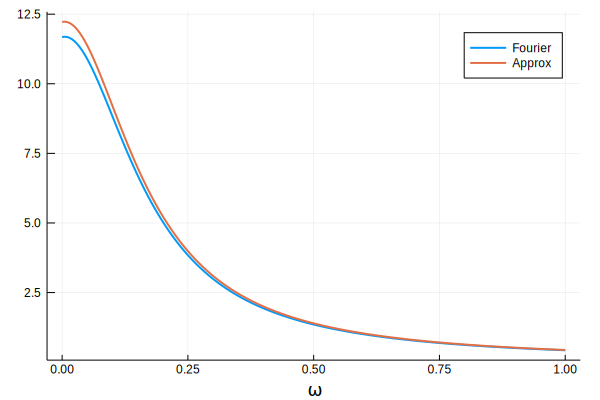

In [9]:
spec_y(ω) = integrate_1d((t) -> ohmic_correlation(t, bath) * exp(1.0im * ω * t), -Inf, Inf)[1]
ω_axis = range(0, 1, length=200)
yf = spec_y.(ω_axis)
yg = [GH(x, bath) for x in ω_axis]
plot(ω_axis, real.(yf), linewidth=2, label="Fourier")
plot!(ω_axis, yg, linewidth=2, label="Approx")
xlabel!("\\omega")